<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%209.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20Transformers/%D0%A2%D0%B5%D0%BC%D0%B0_9_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_Transformers_(%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 9. Прогнозирование временных рядов с помощью Transformers (Примеры)

**1 Введение**

С постоянным ростом вычислительной мощности компьютеров и объема хранимых данных нейросетевые модели глубокого обучения успешно применяются в различных областях, таких как компьютерное зрение, обработка естественного языка, распознавание речи, игры и робототехника. Известными примерами являются AlphaGo, разработанный DeepMind Technologies, первая программа, победившая чемпиона мира в игре Го в 2016 году, и ChatGPT от OpenAI, ставший интернет-сенсацией после выпуска в конце 2022 года. Этот чатбот способен генерировать ответы, напоминающие человеческие, в различных ситуациях, будь то написание статей, ответы на вопросы или создание кода по запросу.

Анализ временных рядов имеет широкий спектр применений в таких областях, как инженерия, экономика, метеорология и финансы. Особое внимание уделяется прогнозированию временных рядов, являющемуся одной из самых сложных задач в инвестициях. Благодаря быстрому росту финансовых данных, мы наблюдаем значительный рост исследований по прогнозированию финансовых показателей, таких как макроэкономические показатели, цены на активы, доходность активов, а также индикаторы риска, включая реализованную и предполагаемую волатильность.

Традиционные статистические модели для моделирования временных рядов можно разделить на две категории: линейные модели временных рядов, такие как модели ARIMA, и нелинейные модели временных рядов, например, модели GARCH. В последние годы модели машинного обучения показали много потенциала для улучшения нашего понимания финансовых рынков.

Развитие глубокого обучения предоставило мощные инструменты для создания нового поколения моделей прогнозирования временных рядов. Глубокие искусственные нейронные сети, способные на обучение временным динамикам полностью на основе данных, особенно хорошо адаптированы к задаче поиска сложных нелинейных связей между входами и выходами. Изначально модель Transformer была разработана и представлена компанией Google в 2017 году (Vaswani et al., 2017). Она призвана обрабатывать последовательные данные с использованием механизмов внимания, что позволяет решать задачи обучения на последовательностях в контексте обработки естественного языка, таких как машинный перевод. Сущность модели Transformer заключается в её способности преобразовывать входную последовательность из одной области в выходную последовательность из другой. Аналогично, если рассматривать один отрезок временного ряда как предложение на одном языке, а следующий отрезок как предложение на другом языке, то задача прогнозирования многократных шагов во временных рядах становится задачей обучения на последовательностях. Именно поэтому модель Transformer представляет интерес для решения задач прогнозирования в анализе временных рядов.


В рамках данной лекции мы обсуждаем два конкретных финансовых приложения модели Transformer. Первое приложение касается создания стратегий следования за трендами. Здесь мы используем кодировщик модели Transformer для построения модели бинарной классификации, предсказывающей направление будущих доходов активов. Второе приложение рассматривает задачу многоуровневой оптимизации портфеля с акцентом на прогнозирование волатильности. Кроме того, в нашей лекции мы обсуждаем вызовы и соображения, связанные с применением моделей машинного обучения в финансовой сфере.

Таким образом, наша лекция охватывает не только теоретические основы и принципы работы модели Transformer в контексте временных рядов, но и её практические применения в современной финансовой аналитике.



### 2. Многошаговое прогнозирование временных рядов

#### 2.1 Проблемы обучения на последовательностях

Последовательностью мы обычно называем набор символов одного типа, расположенных в определённом порядке. Это могут быть числа, буквы, слова, а также события или объекты. Например, порядок, в котором мы посещаем веб-страницы, также является последовательностью. В задачах обучения на последовательностях можно выделить по меньшей мере три основные категории:

1. **Прогнозирование последовательностей**  
   Целью является предсказание категориальной метки или непрерывного значения. Например, для финансового временного ряда часто необходимо предсказать следующее значение в самой последовательности, что и называется прогнозированием временных рядов.

2. **Генерация последовательностей**  
   Целью является преобразование последовательностей из одной области в последовательности другой области. К таким задачам относятся машинный перевод, суммаризация текстов, чат-боты и т.д.

3. **Последовательное принятие решений**  
   Целью является принятие различных решений в последовательном порядке для оптимизации всего процесса, например, оптимальная игра в карточную игру.

Важно отметить, что границы между этими категориями не являются строгими, то есть одна и та же задача может быть отнесена к разным категориям. Например, чат-боты можно отнести как к задачам генерации последовательностей, так и к задачам последовательного принятия решений, поскольку бот должен не только генерировать подходящие ответы на вопросы, но и учитывать контекст, чтобы дать лучший ответ.

## Традиционные методы многошагового прогнозирования временных рядов

### Введение

В экономике и финансах временные ряды, представляющие собой последовательности чисел, упорядоченных во времени, являются основным объектом исследования. Мы занимаемся прогнозированием таких последовательностей, как национальный ВВП, доходность финансовых рынков, волатильность и прочее. Традиционно для моделирования временных рядов использовались статистические модели, такие как авторегрессионная интегрированная скользящая средняя (ARIMA) и обобщенная авторегрессионная условная гетероскедастичность (GARCH). Однако с развитием вычислительных мощностей и популяризацией машинного обучения, особенно глубокого обучения, все чаще применяются модели машинного обучения, такие как рекуррентные нейронные сети (RNN), долгосрочная краткосрочная память (LSTM) и модели с управляемыми рекуррентными блоками (GRU).

### Постановка задачи

Пусть $ X_{1}^{_t} = \{x_1, x_2, \ldots, x_t\} $ — временной ряд из $ t $ прошедших значений динамической системы, где каждое $ x_i $ — это $ d $-мерный вектор, то есть $ x_i = (x_{i}^{1}, x_{i}^{2}, \ldots, x_{i}^{d}) $. Задача прогнозирования временных рядов на момент времени $ t $ заключается в предсказании значений $ X_{t+1}^{t+\tau} = \{x_{t+1}, x_{t+2}, \ldots, x_{t+\tau}\} $ на $ \tau $ шагов вперед.

- Если $ d = 1 $, то это задача одномерного прогнозирования временного ряда.
- Если $ d > 1 $, то это задача многомерного прогнозирования.
- Если $ \tau > 1 $, то это задача многошагового прогнозирования временных рядов.

Существует два подхода к моделированию многошагового прогнозирования:

#### Итеративное многошаговое прогнозирование

В данном случае наша цель — построить одношаговую модель прогнозирования $ f $, которая моделирует связь между прошлыми значениями $ X_{1}^{_t} = \{x_1, x_2, \ldots, x_t\} $ и следующим значением $ x_{t+1} $ динамической системы:

$$ x_{t+1} = f(X_{1}^{_t}) + \epsilon $$

где $ \epsilon $ — это ошибка модели, часто называемая шумом. В процессе прогнозирования мы итеративно применяем эту модель для получения многошаговых предсказаний, как показано на Рисунке 1:

$$ \hat{x}_{t+1} = f(x_1, x_2, \ldots, x_t) $$
$$ \hat{x}_{t+2} = f(x_2, x_3, \ldots, \hat{x}_{t+1}) $$
$$ \hat{x}_{t+3} = f(x_3, x_4, \ldots, \hat{x}_{t+2}) $$
$$ \vdots $$

Таким образом, нам нужно построить всего одну модель $ f $ для многошагового прогнозирования, но ошибка будет накапливаться, поскольку предсказание на момент $ t+1 $ используется как вход для следующего временного шага.


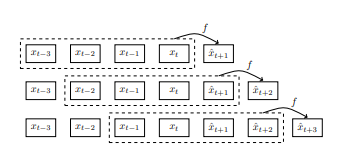


#### Прямое многошаговое прогнозирование

В альтернативном подходе мы строим серию моделей $ g_i $ для $ i = 1, 2, \ldots, \tau $, каждая из которых моделирует связь между прошлыми значениями $ X_{1}^{_t} = \{x_1, x_2, \ldots, x_t\} $ и одним будущим значением динамической системы:

$$ x_{t+i} = g_i(X_{1}^{_t}) + \epsilon_i $$
т.е.
$$ x_{t+1} = g_1(X_{1}^{_t}) + \epsilon_1 $$
$$ x_{t+2} = g_2(X_{1}^{_t}) + \epsilon_2 $$
$$ \vdots $$
$$ x_{t+\tau} = g_{\tau }(X_{1}^{_t}) + \epsilon_\tau $$



где $ \epsilon_i $ — это серия ошибок модели. Кроме того, учитывая, что нейронные сети поддерживают множественные выходы, мы можем заменить все отдельные модели $ g_i $ одной моделью $ g $ с большим количеством параметров, которая может предсказывать все $ \tau $ будущих значений одновременно:

$$ X_{t+1}^{t+\tau} = g(X_{1}^{_t}) + \epsilon $$

Процесс прогнозирования показан на Рисунке 2. В этом случае мы напрямую предсказываем значения нескольких временных шагов, не накапливая ошибок, но не моделируем связь между $ x_{t+1}, x_{t+2}, \ldots, x_{t+\tau} $. Кроме того, этот подход требует обучения большего числа моделей или модели с большим количеством параметров.


##Seq2seq модели


Как было упомянуто в предыдущем разделе, в последние годы все больше моделей глубокого обучения используется для обработки последовательных данных. Наиболее известные из них — это рекуррентные нейронные сети (RNN) и модели с долгосрочной краткосрочной памятью (LSTM).


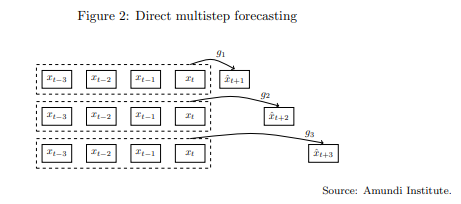



#### Проблемы классических моделей RNN и LSTM

Структура классических моделей RNN или LSTM недостаточно гибка и не может моделировать очень сложные зависимости в последовательных данных. В некоторых задачах обработки естественного языка (NLP), таких как машинный перевод, распознавание речи, суммирование текста и системы вопросов и ответов, длины входных и выходных последовательностей часто не совпадают. В таких случаях требуется другая структура нейронных сетей — модель "последовательность в последовательность" (seq2seq), которая эффективно решает эти проблемы.

### Модель последовательность в последовательность (seq2seq)

Модели seq2seq предназначены для преобразования последовательностей из одной области в последовательности другой области. Как показано на Рисунке 3, модель seq2seq, которую можно рассматривать как специальный тип структуры "многие ко многим", обычно имеет структуру энкодера-декодера:

#### Энкодер

Энкодер преобразует входную последовательность в вектор фиксированной длины, называемый контекстным вектором. Этот контекстный вектор содержит всю информацию, которую энкодер может извлечь из входных данных, включая связи между различными временными шагами и слоями сети.

#### Декодер

Декодер преобразует контекстный вектор в выходную последовательность. В зависимости от целей и различных способов обучения декодер может иметь входные данные или работать без них.


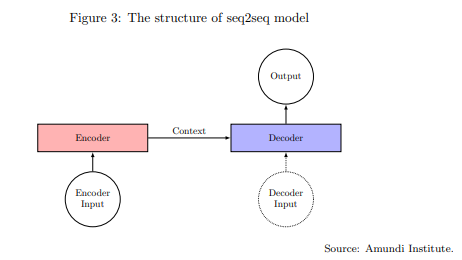


### Применение seq2seq моделей к задачам прогнозирования временных рядов

С увеличением вычислительной мощности с 2000 года все больше моделей глубокого обучения используется для решения задач прогнозирования временных рядов, так как эти задачи могут рассматриваться как задачи "последовательность в последовательность", особенно в случае многошагового прогнозирования временных рядов. На практике энкодер и декодер могут состоять из одного или нескольких слоев RNN и LSTM.

Энкодер преобразует входную последовательность $ \{x_1, \ldots, x_t\} $ в $ d' $-мерный контекстный вектор $ z = (z_1, \ldots, z_{d'}) $, а декодер преобразует эту последовательность контекста в выходную последовательность $ y_{t+1}, \ldots, y_{t+\tau} $.

### Методы многошагового прогнозирования с использованием структуры энкодер-декодер

#### Прямое многошаговое прогнозирование

Как показано на Рисунке 4a, простая структура энкодер-декодер соответствует прямому многошаговому прогнозированию, как на Рисунке 2. В этой структуре контекстный вектор $ z $ общий для всех выходов $ \{y_{t+1}, \ldots, y_{t+\tau}\} $, и декодер не имеет других входных данных.

#### Итеративное многошаговое прогнозирование

На Рисунке 4b показана рекурсивная структура энкодер-декодер, которая аналогична итеративному многошаговому прогнозированию. Контекстный вектор $ z $ используется только в качестве входных данных для декодера $ t+1 $ для предсказания первого выхода $ y_{t+1} $, затем $ z $ может быть обновлен перед передачей декодеру $ t+2 $. В этой структуре у декодера могут быть входные данные. Если мы не используем истинные метки в качестве входных данных для декодера во время обучения, это называется техникой "свободного выполнения" (free running). Если мы используем их как правильный ответ, подход называется техникой "принудительного обучения" (teacher forcing). Подробные технические детали о техниках "свободного выполнения" и "принудительного обучения" можно найти в Приложении B.3.


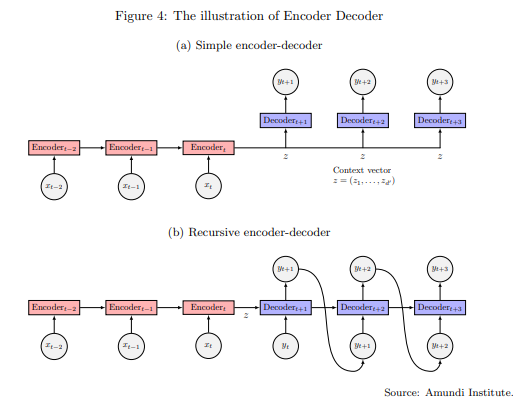


## Заключение

Использование структуры энкодер-декодер с техникой принудительного обучения подходит для задач многошагового прогнозирования временных рядов. В этом случае мы можем моделировать зависимость между предсказаниями, одновременно уменьшая накопление ошибок прогноза.
